## Author: Mitchell Krystofiak
## Class: COSC 311 - Lab2
## Date : September 24, 2021
## Description: Working with accessing elements from pandas dataframes, reporting useful statistics and visualizing them graphically.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
#read adult data into a pandas dataframe
#need to take in consideration :lack of headers, extra white space, need to add in headers
adults = pd.read_csv('./adult.data',
                         skipinitialspace=True,
                         header=None, 
                         names = ['age','workclass','fnlwgt','education','education-num',
                                  'marital-status','occupation','relationship','race',
                                  'sex','capital-gain','capital-loss','hours-per-week',
                                  'native-country','income'])

In [3]:
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 1. Rank each job by it's liklihood to make above 50K.

In [4]:
job_count_above_50 = adults[['occupation','income']][adults['income'] == '>50K'].groupby(adults['occupation']).count()['occupation']
job_count_below_50 = adults[['occupation','income']][adults['income'] == '<=50K'].groupby(adults['occupation']).count()['occupation']
total_job_count = adults[['occupation','income']].groupby(adults['occupation']).count()['occupation']
print(job_count_above_50)
print(job_count_below_50)
print(total_job_count)

occupation
?                     191
Adm-clerical          507
Armed-Forces            1
Craft-repair          929
Exec-managerial      1968
Farming-fishing       115
Handlers-cleaners      86
Machine-op-inspct     250
Other-service         137
Priv-house-serv         1
Prof-specialty       1859
Protective-serv       211
Sales                 983
Tech-support          283
Transport-moving      320
Name: occupation, dtype: int64
occupation
?                    1652
Adm-clerical         3263
Armed-Forces            8
Craft-repair         3170
Exec-managerial      2098
Farming-fishing       879
Handlers-cleaners    1284
Machine-op-inspct    1752
Other-service        3158
Priv-house-serv       148
Prof-specialty       2281
Protective-serv       438
Sales                2667
Tech-support          645
Transport-moving     1277
Name: occupation, dtype: int64
occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      

In [5]:
percentages_above_50 = []
for i in range(len(total_job_count)):
    percentages_above_50.append(0)

for i in range(len(total_job_count)):
        percentages_above_50[i] = round((job_count_above_50[i]/total_job_count[i])*100,2)

print(percentages_above_50)

#TODO *********
#need to rank these.. first need to connect with job title for ranking purposes

[10.36, 13.45, 11.11, 22.66, 48.4, 11.57, 6.28, 12.49, 4.16, 0.67, 44.9, 32.51, 26.93, 30.5, 20.04]


In [6]:
ranks = [{"Job":i, "Percent":n} for i,n in zip(total_job_count.keys(), percentages_above_50)]
Sorted_ranks = sorted(ranks, key = lambda i: i['Percent'],reverse=True)
count = 1
print("Jobs most likely to make above $50K:\n")
for i in Sorted_ranks:
    print(f"{count}. {i['Job']}")
    count +=1 

Jobs most likely to make above $50K:

1. Exec-managerial
2. Prof-specialty
3. Protective-serv
4. Tech-support
5. Sales
6. Craft-repair
7. Transport-moving
8. Adm-clerical
9. Machine-op-inspct
10. Farming-fishing
11. Armed-Forces
12. ?
13. Handlers-cleaners
14. Other-service
15. Priv-house-serv


## 2.  Get median age of people who make more and less than 50K. Get median age of people who make more and less than 50K by sex.

In [7]:
# 2. Get median age of people who make more and less than 50K.
median_age_above_50 = adults[['age','income']][adults['income'] == '>50K'].sort_values('age').median()['age']
median_age_below_50 = adults[['age','income']][adults['income'] == '<=50K'].sort_values('age').median()['age']
print(f"Median age above 50K: {median_age_above_50}")
print(f"Median age below 50K: {median_age_below_50}")

Median age above 50K: 44.0
Median age below 50K: 34.0


In [8]:
# And median age of people who make more and less than 50k by sex.

# Option 1:
#temp = adults[['age','income','sex']]
#medain_age_above_50_f =temp[temp['sex'] == "Female"].sort_values('age').median()['age']

# Option 2: 
median_age_above_50_f = adults[['age','income','sex']][(adults['income'] == '>50K') & (adults['sex'] == 'Female')].sort_values('age').median()['age']

median_age_above_50_m = adults[['age','income','sex']][(adults['income'] == '>50K') & (adults['sex'] == "Male")].sort_values('age').median()['age']
median_age_below_50_f = adults[['age','income','sex']][(adults['income'] == '<=50K') & (adults['sex'] == "Female")].sort_values('age').median()['age']
median_age_below_50_m = adults[['age','income','sex']][(adults['income'] == '<=50K') & (adults['sex'] == "Male")].sort_values('age').median()['age']

print(f"Median age above 50K and Female: {median_age_above_50_f}")
print(f"Median age above 50K and Male: {median_age_above_50_m}")
print(f"Median age below 50K and Female: {median_age_below_50_f}")
print(f"Median age below 50K and Male: {median_age_below_50_m}")

Median age above 50K and Female: 41.0
Median age above 50K and Male: 44.0
Median age below 50K and Female: 34.0
Median age below 50K and Male: 35.0


## 3. Calculate the mean and median number of years of education held by adults who make more and less than 50K.

In [9]:
education_mean_above_50 = adults[['education-num','income']][adults['income'] == '>50K'].mean()['education-num']
education_mean_below_50 = adults[['education-num','income']][adults['income'] == '<=50K'].mean()['education-num']
education_median_above_50 = adults[['education-num','income']][adults['income'] == '>50K'].median()['education-num']
education_median_below_50 = adults[['education-num','income']][adults['income'] == '<=50K'].median()['education-num']

print(f"Education mean above 50K: {round(education_mean_above_50,2)}")
print(f"Education mean below 50K: {round(education_mean_below_50,2)}")
print(f"Education median above 50K: {education_median_above_50}")
print(f"Education median below 50K: {education_median_below_50}")

Education mean above 50K: 11.61
Education mean below 50K: 9.6
Education median above 50K: 12.0
Education median below 50K: 9.0


## 4/5. Plot a histogram to see the distribution of years of school held by adults who make more and less than 50K. Add some other variables such as age, gender, etc... Plot a histrogram to see the distribution of ages of adults who make more than or less than 50K.


Text(0, 0.5, 'Frequency')

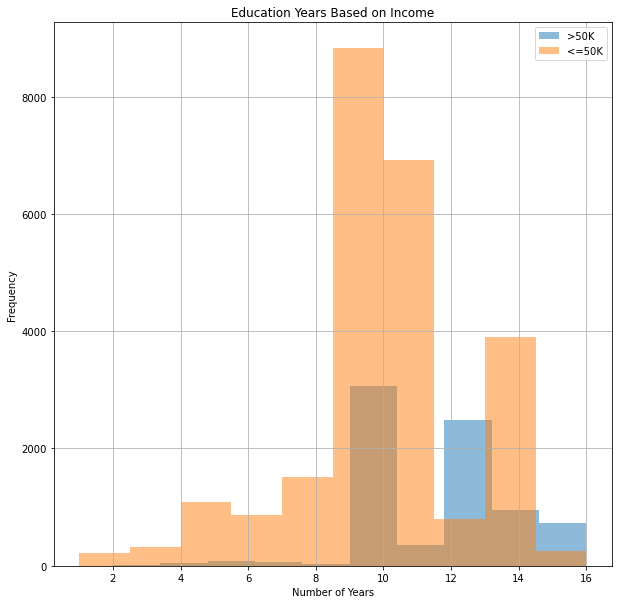

In [10]:
#Histogram of education num to income
adults['education-num'][adults['income'] == '>50K'].hist(bins=10,alpha=0.5,legend=True,figsize=(10,10))
adults['education-num'][adults['income'] == '<=50K'].hist(bins=10,alpha=0.5,legend=True,figsize=(10,10))
plt.title("Education Years Based on Income")
plt.legend(['>50K', '<=50K'])
plt.xlabel("Number of Years")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

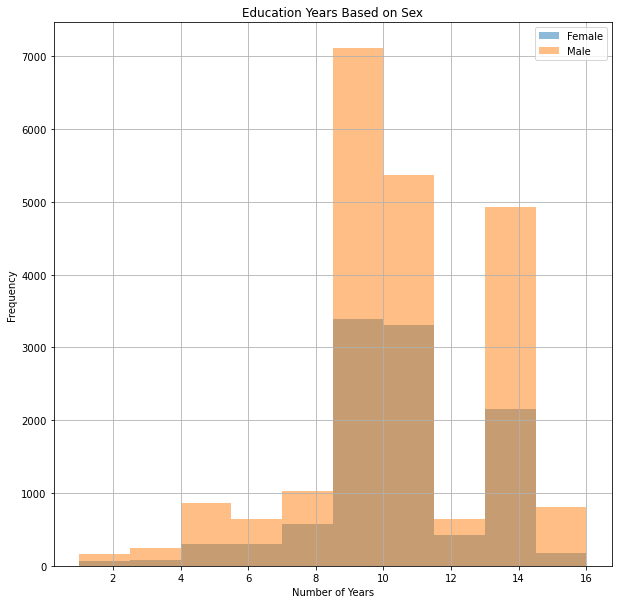

In [11]:
#education num to sex
adults['education-num'][adults['sex']=="Female"].hist(bins=10, alpha=0.5,legend=True,figsize=(10,10))
adults['education-num'][adults['sex']=="Male"].hist(bins=10, alpha=0.5,legend=True,figsize=(10,10))
plt.title("Education Years Based on Sex")
plt.legend(['Female','Male'])
plt.xlabel("Number of Years")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

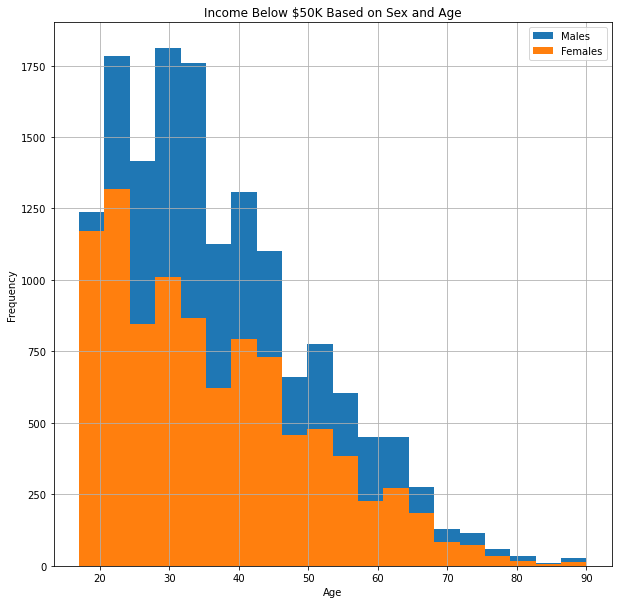

In [12]:
#income to sex below 50k
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']

males[males['income'] == '<=50K']['age'].hist(bins=20, legend=True,figsize=(10,10))
females[females['income'] == '<=50K']['age'].hist(bins=20, legend=True,figsize=(10,10))
plt.legend(['Males', 'Females'])
plt.title("Income Below $50K Based on Sex and Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

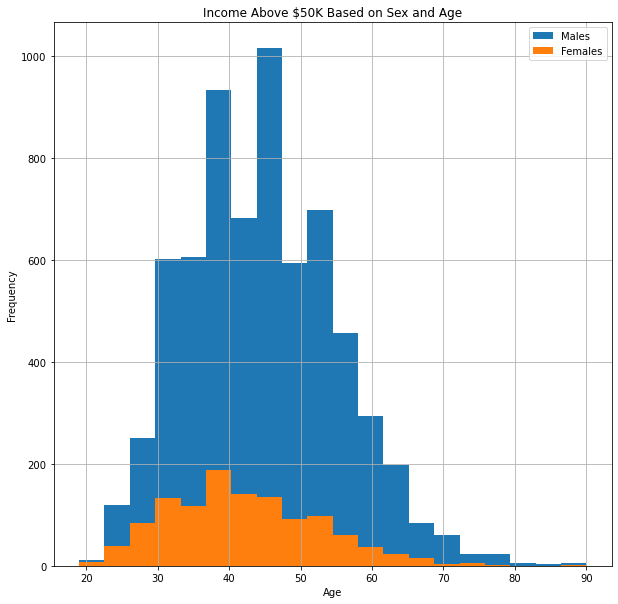

In [13]:
#income to sex above 50k
males[males['income'] == '>50K']['age'].hist(bins=20, legend=True,figsize=(10,10))
females[females['income'] == '>50K']['age'].hist(bins=20, legend=True,figsize=(10,10))
plt.legend(['Males', 'Females'])
plt.title("Income Above $50K Based on Sex and Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0.5, 0, 'Age')

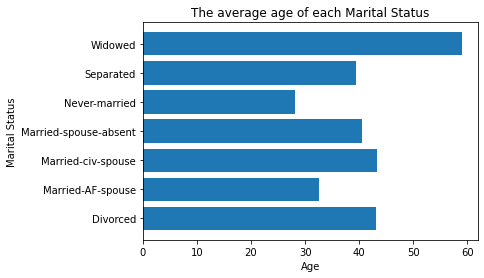

In [14]:
h = adults.groupby('marital-status')['age'].mean()
plt.barh(h.keys(), h)
plt.title("The average age of each Marital Status")
plt.ylabel("Marital Status")
plt.xlabel("Age")

In [15]:
age_to_education_num = adults.groupby('age')['education-num'].mean()

Text(0.5, 1.0, 'The average years of education across different ages')

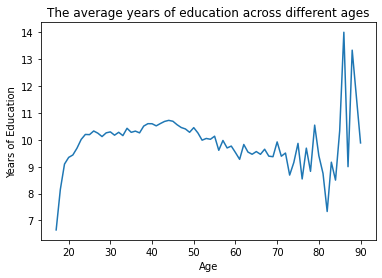

In [16]:
plt.plot(age_to_education_num.keys(), age_to_education_num)
plt.xlabel("Age")
plt.ylabel("Years of Education")
plt.title("The average years of education across different ages")

Text(0, 0.5, 'Hours Per Week Worked')

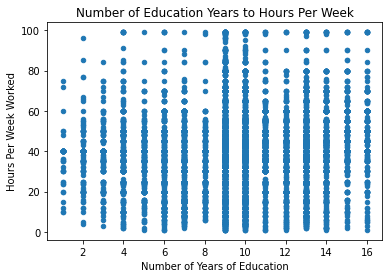

In [17]:
adults[['education-num','hours-per-week']].plot.scatter(x='education-num',y='hours-per-week')
plt.title("Number of Education Years to Hours Per Week")
plt.xlabel("Number of Years of Education")
plt.ylabel("Hours Per Week Worked")

Text(0, 0.5, 'Frequency')

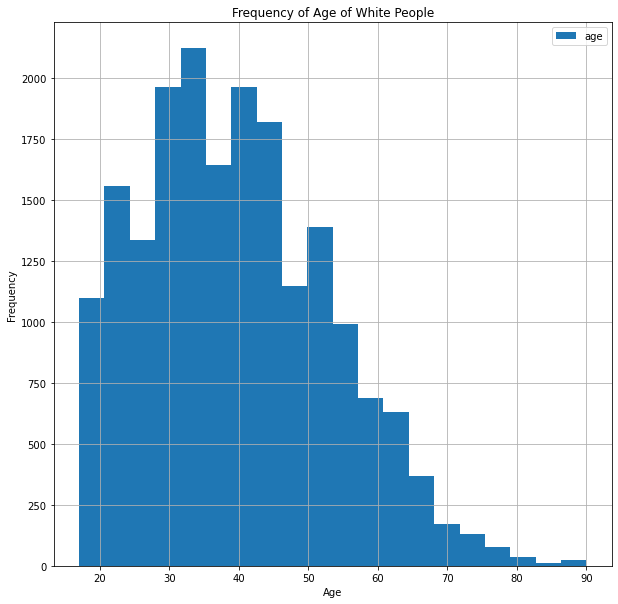

In [18]:
males[males['race'] == 'White']['age'].hist(bins=20, legend=True,figsize=(10,10))
plt.title('Frequency of Age of White People')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [19]:
male_above_50 = adults[['occupation','income','sex']][(adults['income'] == '>50K') & (adults['sex'] == 'Male')].groupby(['occupation']).count()['income']
male_below_50 = adults[['occupation','income','sex']][(adults['income'] == '<=50K') & (adults['sex'] == 'Male')].groupby(['occupation']).count()['income']
female_above_50 = adults[['occupation','income','sex']][(adults['income'] == '>50K') & (adults['sex'] == 'Female')].groupby(['occupation']).count()['income']
female_below_50 = adults[['occupation','income','sex']][(adults['income'] == '<=50K') & (adults['sex'] == 'Female')].groupby(['occupation']).count()['income']

In [20]:
print(male_above_50)
print(male_below_50)
print(female_above_50)
print(female_below_50)

occupation
?                     139
Adm-clerical          295
Armed-Forces            1
Craft-repair          909
Exec-managerial      1688
Farming-fishing       113
Handlers-cleaners      82
Machine-op-inspct     230
Other-service          86
Prof-specialty       1474
Protective-serv       201
Sales                 895
Tech-support          238
Transport-moving      311
Name: income, dtype: int64
occupation
?                     863
Adm-clerical          938
Armed-Forces            8
Craft-repair         2968
Exec-managerial      1219
Farming-fishing       816
Handlers-cleaners    1124
Machine-op-inspct    1222
Other-service        1409
Priv-house-serv         8
Prof-specialty       1151
Protective-serv       372
Sales                1492
Tech-support          342
Transport-moving     1196
Name: income, dtype: int64
occupation
?                     52
Adm-clerical         212
Craft-repair          20
Exec-managerial      280
Farming-fishing        2
Handlers-cleaners      4
Machine-o

In [21]:
over_50K = adults[adults['income'] == '>50K']
under_50K = adults[adults['income'] == '<=50K']

over_50K_countries = over_50K.groupby('native-country')[['native-country','occupation']]
over_50K_countries.describe()

native-country                                  occupation  \
                            count unique                 top  freq      count   
native-country                                                                  
?                             146      1                   ?   146        146   
Cambodia                        7      1            Cambodia     7          7   
Canada                         39      1              Canada    39         39   
China                          20      1               China    20         20   
Columbia                        2      1            Columbia     2          2   
Cuba                           25      1                Cuba    25         25   
Dominican-Republic              2      1  Dominican-Republic     2          2   
Ecuador                         4      1             Ecuador     4          4   
El-Salvador                     9      1         El-Salvador     9          9   
England                        30      1             England    30         30   
France                         12      1              France    12         12   
Germany                        44      1             Germany    44         44   
Greece                          8      1              Greece     8          8   
Guatemala                       3      1           Guatemala     3          3   
Haiti                           4      1               Haiti     4          4   
Honduras                        1      1            Honduras     1          1   
Hong                            6      1                Hong     6          6   
Hungary                         3      1             Hungary     3          3   
India                          40      1               India    40         40   
Iran                           18      1                Iran    18         18   
Ireland                         5      1             Ireland     5          5   
Italy                          25      1               Italy    25         25   
Jamaica                        10      1             Jamaica    10         10   
Japan                          24      1               Japan    24         24   
Laos                            2      1                Laos     2          2   
Mexico                         33      1              Mexico    33         33   
Nicaragua                       2      1           Nicaragua     2          2   
Peru                            2      1                Peru     2          2   
Philippines                    61      1         Philippines    61         61   
Poland                         12      1              Poland    12         12   
Portugal                        4      1            Portugal     4          4   
Puerto-Rico                    12      1         Puerto-Rico    12         12   
Scotland                        3      1            Scotland     3          3   
South                          16      1               South    16         16   
Taiwan                         20      1              Taiwan    20         20   
Thailand                        3      1            Thailand     3          3   
Trinadad&Tobago                 2      1     Trinadad&Tobago     2          2   
United-States                7171      1       United-States  7171       7171   
Vietnam                         5      1             Vietnam     5          5   
Yugoslavia                      6      1          Yugoslavia     6          6   

                                                   
                   unique               top  freq  
native-country                                     
?                      12    Prof-specialty    48  
Cambodia                5      Craft-repair     2  
Canada                 11    Prof-specialty     8  
China                   5    Prof-specialty    11  
Columbia                2    Prof-specialty     1  
Cuba                    9   Exec-managerial     7  
Dominican-Republic      2    Prof-specialty     1  
Ecuador        

### Problems

(a) When referring to the histograms comparing income to sex, we can easily observe that men dominate the sample size, i.e. the data reports ~22000 men values and ~11000 women values, just about double. With this in mind, there are still conclusions to be made. Looking at the histogram comparing men and women of income above 50K, we see that men appear more than double the amount of times as women do. If we were to estimate an equal amount of men and women, the men in their middle careers (30's-50's), even if the frequency is split in half, still appear far more than women. For the other histogram looking at less than 50K, women are still under men in frequency, however it is clear that women appear much more frequently in jobs paying under 50K. Thus, in reference to the adults data set, more men make above 50K, and more women make below 50K, accounting for the double men data.

(b) When looking at the occupations of males vs females who make above or below 50K, we repeat a result we discovered earlier in the ranking process. For males who make above 50K, the max number of jobs are in exec-managerial. For females who make above 50K, the max number of jobs are in prof-specialty. For males who make below 50K, the max job is in craft-material. For females who make below 50K, the max job is in adm-clerical.

(c) If you look at the chart above, the last column documents what we want to see. It may not be the most clear and concise chart to read, but the rightmost cloumn shows the counts of each job count in every country. For example, the United States has the Most Jobs in Exec-managerial, which is a result we already showed. Or a lot of other countries have Exec-managerial or prof-speciality as their top jobs.

(d) The average years of education per race seems to be pretty similar on average: Amer-Indian-Eskimo and Black have about 9.3-9.4 years of education, White has about 10.1 years of education, Asian-Pac-Islander has about 10.9 years of education, and other races have about 8.8 years of education. In terms of income, looking at the describe data below, we can see that for each race above 50K, the average education-num goes up to between 11-12 years. And for those below 50K, the education-num goes down below 8.5 and 10.4 years of education.

In [22]:
adults[['race','education-num']][adults['income'] == '>50K'].groupby(adults['race']).describe()

education-num                                              \
                           count       mean       std  min   25%   50%   75%   
race                                                                           
Amer-Indian-Eskimo          36.0  11.222222  2.519763  7.0   9.0  10.0  13.0   
Asian-Pac-Islander         276.0  12.398551  2.391013  3.0  10.0  13.0  14.0   
Black                      387.0  11.077519  2.373032  2.0   9.0  10.0  13.0   
Other                       25.0  11.600000  3.055050  3.0  10.0  12.0  14.0   
White                     7117.0  11.612196  2.374496  2.0  10.0  12.0  13.0   

                          
                     max  
race                      
Amer-Indian-Eskimo  16.0  
Asian-Pac-Islander  16.0  
Black               16.0  
Other               16.0  
White               16.0

In [23]:
adults[['race','education-num']][adults['income'] == '<=50K'].groupby(adults['race']).describe()

education-num                                             \
                           count       mean       std  min  25%   50%   75%   
race                                                                          
Amer-Indian-Eskimo         275.0   9.061818  2.164705  2.0  9.0   9.0  10.0   
Asian-Pac-Islander         763.0  10.440367  2.772199  1.0  9.0  10.0  13.0   
Black                     2737.0   9.261235  2.196340  1.0  9.0   9.0  10.0   
Other                      246.0   8.560976  3.114538  1.0  7.0   9.0  10.0   
White                    20699.0   9.627422  2.435512  1.0  9.0   9.0  10.0   

                          
                     max  
race                      
Amer-Indian-Eskimo  16.0  
Asian-Pac-Islander  16.0  
Black               16.0  
Other               16.0  
White               16.0

In [30]:
adults[['occupation','sex','education-num']].groupby(['occupation','sex']).mean().reset_index().pivot(index='occupation',columns='sex',values='education-num')

sex,Female,Male
occupation,,
?,9.244946,9.260479
Adm-clerical,9.996453,10.354420
Armed-Forces,NaN,10.111111
Craft-repair,9.225225,9.104204
Exec-managerial,11.154443,11.566563
Farming-fishing,8.569231,8.611410
Handlers-cleaners,8.609756,8.496683
Machine-op-inspct,8.101818,8.633609
Other-service,8.811111,8.741806
